In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Data reading
df_all = pd.read_excel("all_merged_data.xlsx")
df = df_all.drop(['Unnamed: 0', 'Gene', 'TF number', 'Assigned name'], axis=1)
print(df.head())



   scSoA  scYFP  inYFP  scTlG  HAC_scYFP  OE_inRedStar  \
0  -4.20  -0.67    0.0   0.00       0.00      1.762627   
1  -1.22  -0.70    0.0   0.22       0.00      1.000000   
2   1.48   1.08    0.0   0.72       1.02      0.960393   
3   0.84   0.00    0.0  -0.28       0.00      1.564276   
4   0.57   0.36    0.0   0.00       0.00      0.757495   

   OE_normalized_inRedStar  KO_inRedStar  KO_normalized_inRedStar  
0                 1.772074      2.478464                 1.938628  
1                 1.000000      1.000000                 1.000000  
2                 0.955512      1.000000                 1.000000  
3                 1.467663      1.000000                 1.000000  
4                 0.833487      1.000000                 1.000000  


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


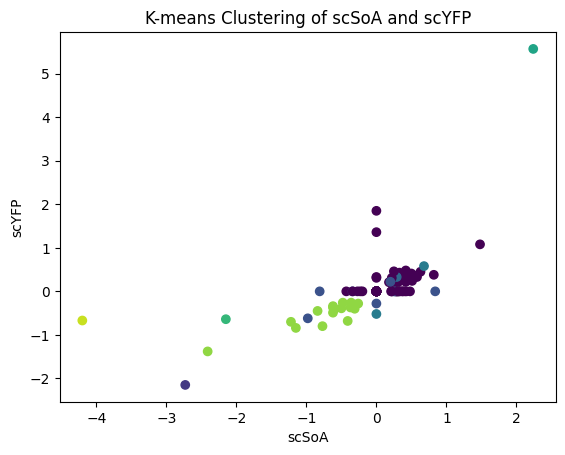

In [2]:
# Selection of two columns
x, y = df['scSoA'], df['scYFP']

# Data standardisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Grouping by k-means
kmeans = KMeans(n_clusters=13, random_state=42)
df['Clusters'] = kmeans.fit_predict(df_scaled)

# Visualisation of results
plt.scatter(x, y, c=df['Clusters'], cmap="viridis")
plt.xlabel('scSoA')
plt.ylabel('scYFP')
plt.title("K-means Clustering of scSoA and scYFP")
plt.show()

In [3]:
pd.options.display.max_rows = 200

df_all['Clusters'] = df['Clusters']
df_sorted = df_all.sort_values('Clusters').drop(['Unnamed: 0'], axis=1)

print(df_sorted)

df_sorted.to_excel('clusters.xlsx')



               Gene TF number       Assigned name  scSoA  scYFP  inYFP  scTlG  \
69    YALI0_B20944g     TF011                   -   0.22   0.00   0.00   0.00   
100   YALI0_E17721g     TF046                   -   0.00   0.00   0.00   0.00   
99    YALI0_E17215g     TF045                   -   0.00   0.00   0.00   0.00   
98    YALI0_E03410g     TF040              ERT1-2   0.00   0.00   0.00   0.00   
97    YALI0_D23045g     TF038                AHR1   0.00   0.00   0.00   0.00   
96    YALI0_D20460g     TF036                LAC9   0.00   0.00   0.00   0.00   
94    YALI0_D06193g     TF027                   -   0.00   0.00   0.00   0.00   
93    YALI0_C16390g     TF021                   -   0.00   0.00   0.00   0.00   
92    YALI0_C15202g     TF020                   -   0.00   0.00   0.00   0.00   
90    YALI0_B14443g     TF009                JMC2   0.00   0.00   0.00   0.00   
89    YALI0_B09713g     TF005                PPR1   0.00   0.00   0.00   0.00   
88    YALI0_B06853g     TF00

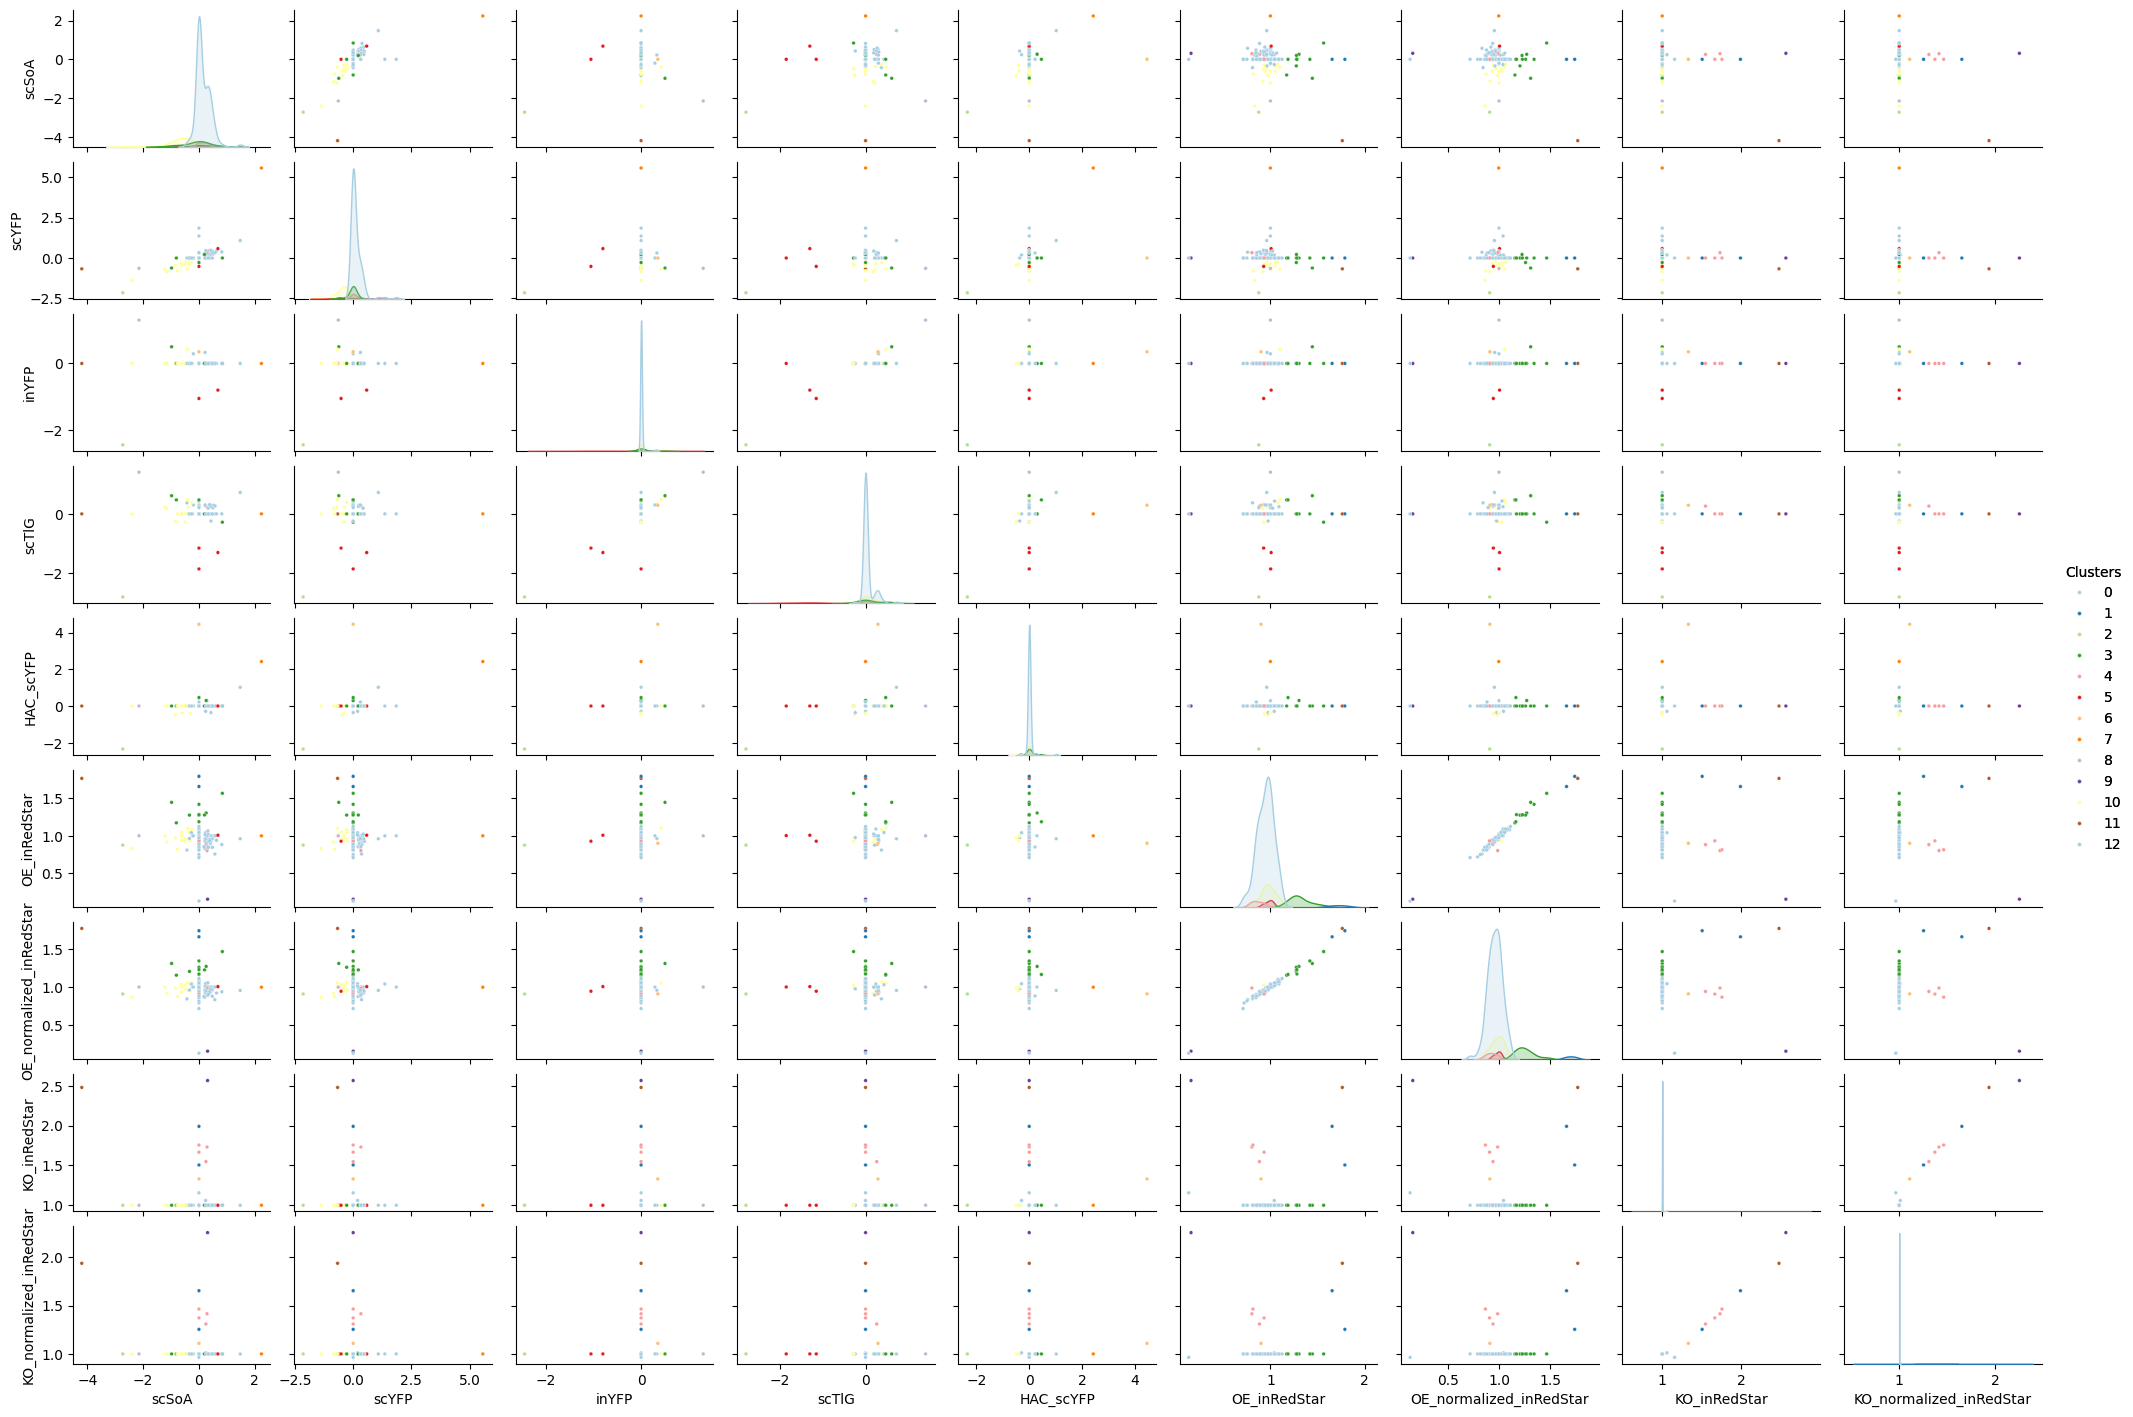

In [4]:
import seaborn as sns

g = sns.pairplot(df, hue='Clusters', palette='Paired', height=1.6, aspect=1.4, plot_kws={'s':7})
g.add_legend()
plt.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

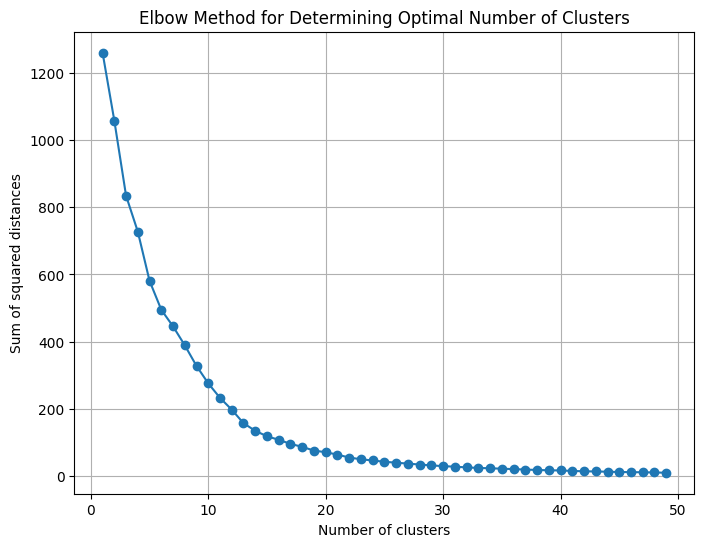

In [5]:
# Wykorzystanie metody łokcia do określenia liczby klastrów

import numpy as np


# Creating an elbow method chart
inertias = []

for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    

plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), inertias, '-o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.savefig('Figure_S1.png')
